In [1]:
using CairoMakie
using ColorSchemes
using ColorTypes
using Random


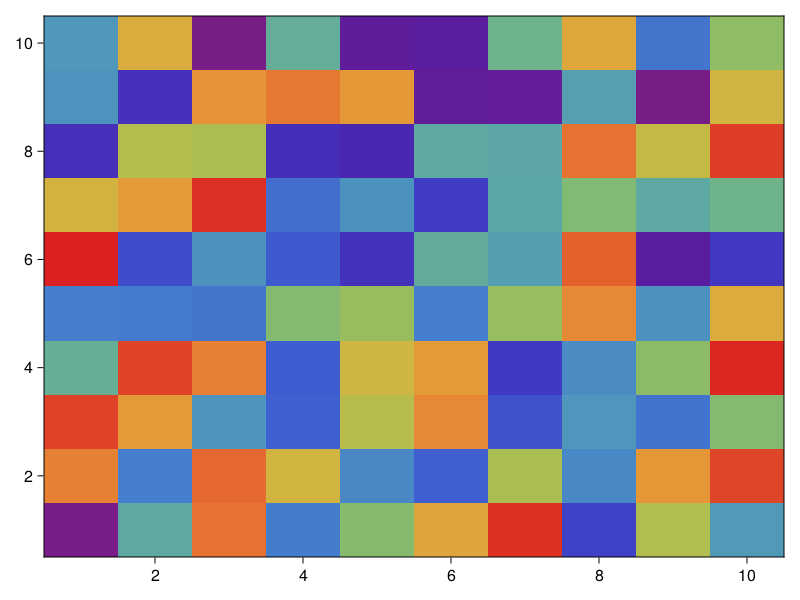

In [2]:

# Generate some example data
data = rand(10, 10)

# Create a new figure
fig = Figure()

# Add a heatmap to the figure
heatmap(fig[1, 1], data, colormap = ColorSchemes.rainbow)

# Show the figure
fig

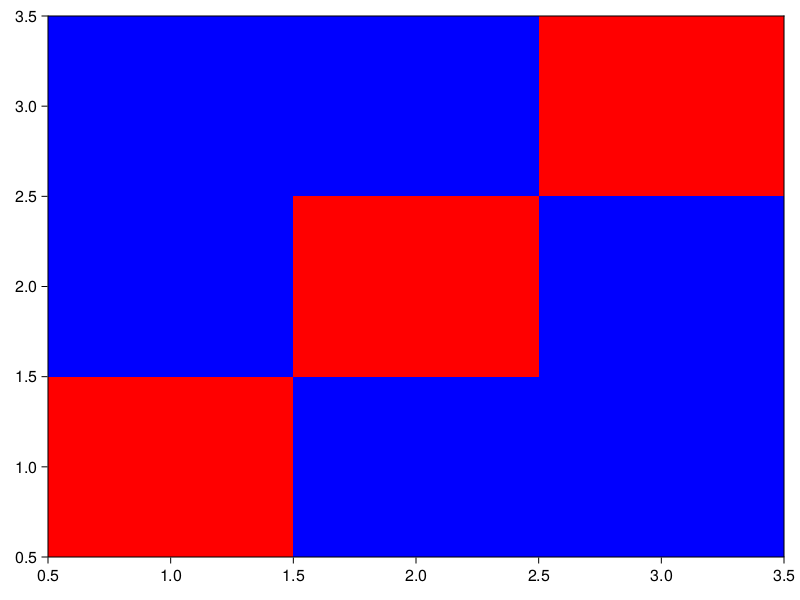

In [6]:


# Generate some example data
#data = rand(10, 10)
data = Matrix{Int}(
    [1 0 0;
    0 1 0;
    0 0 1])

colormap_rgb = [RGB(0,0,1), RGB(1,0,0) ]

# Create a new figure
fig = Figure()

# Add a heatmap to the figure
heatmap(fig[1, 1], data, 
    colormap = colormap_rgb)

# Show the figure
fig

In [7]:
rand(2,2)

2×2 Matrix{Float64}:
 0.498177  0.29152
 0.317591  0.975575

In [35]:
A = B = Matrix{Int}([1 2 3; 4 5 6; 7 8 9])

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [3]:


function zpW(num)
  num = Int(num)  
  ncol = 101      # number of col.
  nrow =  200     
  locM = div(ncol,2)+1
  St = zeros(Int,ncol)
  spM = zeros(Int,nrow,ncol)
  St[locM] = 1 
  #nrow,ncol = size(spM)
  nextSt = zeros(Int,ncol)  
  d1 = digits(num,base=2,pad=8)
  d1 = reverse!(d1)
  for i in  1:nrow
      spM[i,:] = St
      perm=[[ii,jj,kk] for ii=0:1,jj=0:1,kk=0:1]                  
      #====================#
      for j in 2:ncol-1
          for ip in 1:8
              if St[j-1:j+1] == perm[ip] 
                  nextSt[j] = d1[ip]
              end
          end    
      end        

      #====================#
      for ip in 1:8
        if  [St[ncol],St[1],St[2]] == perm[ip] 
            nextSt[1] = d1[ip]
        end
        if  [St[ncol],St[ncol],St[1]] == perm[ip] 
          nextSt[ncol] = d1[ip]
        end
      end    

      #nextSt[1]   = mod(St[ncol] + St[1] + St[2],2)
      #nextSt[ncol]= mod(St[ncol-1] + St[ncol] + St[1],2)            

      St =deepcopy(nextSt)         
  end
  return spM 
end



zpW (generic function with 1 method)

In [13]:
[255,215,0]/255

3-element Vector{Float64}:
 1.0
 0.8431372549019608
 0.0

In [4]:
colormap_rgb = [RGB(0,0,0), RGB(1,0.8431,0)]



data =zpW(var)
# Create a new figure
fig = Figure()

heatmap(data,
        colormap = colormap_rgb)
  

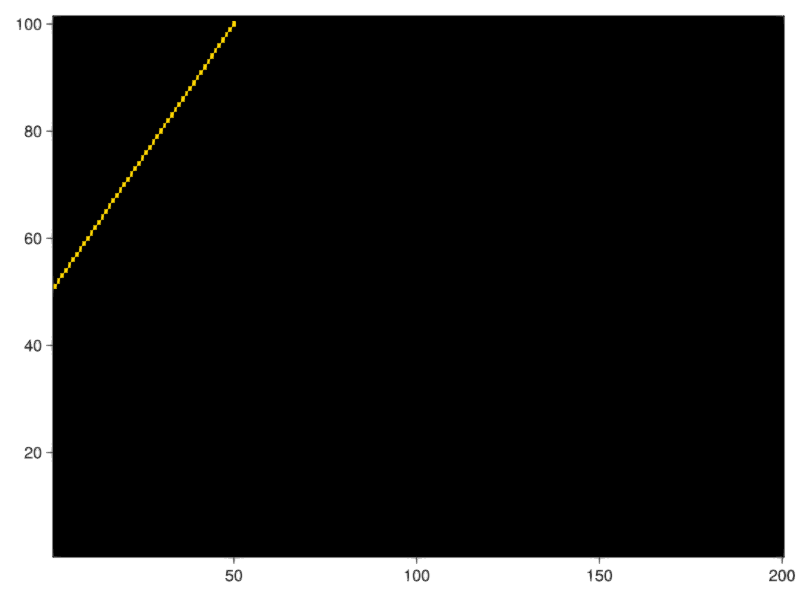

In [22]:
#colormap_rgb = [RGB(0,0,1), RGB(1,0,0) ]colormap = colormap_rgb 

using GLMakie

iter = Observable(64)

data = @lift zpW($iter)

colormap_rgb = [RGB(0,0,0), RGB(1,0.8431,0)]
fig = Figure()

heatmap(data,
colormap = colormap_rgb)

#timestamps = range(0, 10)
#record(fig,"time_animation.mp4", timestamps;
#        framerate = 12) do iter
#    iter[] = iter
#end



In [24]:
iter[]= 1

1

In [20]:
?Observable()

```
obs = Observable(val; ignore_equal_values=false)
obs = Observable{T}(val; ignore_equal_values=false)
```

Like a `Ref`, but updates can be watched by adding a handler using [`on`](@ref) or [`map`](@ref). Set `ignore_equal_values=true` to not trigger an event for `observable[] = new_value` if `isequal(observable[], new_value)`.


In [45]:
using GLMakie

time = Observable(0.0)

xs = range(0, 7, length=40)

ys = @lift(sin.(xs .- $time))

fig = lines(xs, ys, color = :blue, linewidth = 4,
    axis = (title = @lift("t = $(round($time, digits = 1))"),))

scatter!(xs, ys, color = :red, markersize = 15)

framerate = 100
timestamps = range(0, 10)

record(fig, "time_animation.mp4", timestamps;
        framerate = 12) do t
    time[] = t
end

"time_animation.mp4"